In [19]:
import pandas as pd
from pathlib import Path
from PIL import Image
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from utils.config import (
    dataset_test_path,
    dataset_train_path,
    dataset_validate_path,
    dataset_images_path)

sns.set_theme(style="darkgrid")
pd.options.display.float_format = '{:20,.2f}'.format

%matplotlib inline

# Data Analysis

In [2]:
test_df = pd.read_csv(dataset_test_path, sep='\t', header=0)
train_df = pd.read_csv(dataset_train_path, sep='\t', header=0)
validate_df = pd.read_csv(dataset_validate_path, sep='\t', header=0)

train_df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


Convert the label columns from int64 to category.

In [3]:
for df in [test_df, train_df, validate_df]:
    for col in ['2_way_label', '3_way_label', '6_way_label']:
        df[col] = df[col].astype('category').cat.as_ordered()
        
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563613 entries, 0 to 563612
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   author                534935 non-null  object  
 1   clean_title           563613 non-null  object  
 2   created_utc           563613 non-null  float64 
 3   domain                396142 non-null  object  
 4   hasImage              563613 non-null  bool    
 5   id                    563613 non-null  object  
 6   image_url             562079 non-null  object  
 7   linked_submission_id  167471 non-null  object  
 8   num_comments          396142 non-null  float64 
 9   score                 563613 non-null  int64   
 10  subreddit             563613 non-null  object  
 11  title                 563613 non-null  object  
 12  upvote_ratio          396142 non-null  float64 
 13  2_way_label           563613 non-null  category
 14  3_way_label           563613 non-nul

## Plot distribution of labels

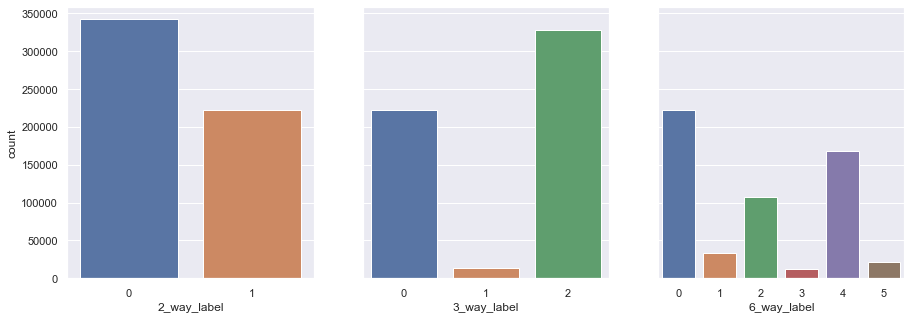

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))

g0 = sns.countplot(data=train_df, x="2_way_label", ax=ax1)
g1 = sns.countplot(data=train_df, x="3_way_label", ax=ax2)
g2 = sns.countplot(data=train_df, x="6_way_label", ax=ax3)

g1.set(ylabel=None)
g2.set(ylabel=None)

plt.show();

# Image Analysis

In [5]:
frames = [train_df, train_df, train_df]
total_df = pd.concat(frames)

### Image sizes

In [6]:
tqdm.pandas(desc="progress bar")

def get_sizes(row):
    width = None
    height = None
    img_path = Path(dataset_images_path, f'{row.id}.jpg')
    
    with Image.open(img_path) as img:
        width, height = img.size

    return pd.Series([width, height], index=['img_width', 'img_height'])

x = total_df.progress_apply(get_sizes, axis=1)

C:\Users\maart\AppData\Roaming\Python\Python38\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
progress bar:   8%|████▍                                                    | 131677/1690839 [01:24<16:16, 1596.43it/s]C:\Users\maart\AppData\Roaming\Python\Python38\site-packages\PIL\Image.py:2832: DecompressionBombWarning: Image size (110718270 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
progress bar:  12%|███████▏                                                  | 209301/1690839 [02:23<35:47, 689.76it/s]C:\Users\maart\AppData\Roaming\Python\Python38\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
progress bar:  21%|████████████▍                                             | 361546/1690839 [05:22<

In [20]:
x.describe()

,img_width,img_height
count,"1,690,839.00","1,690,839.00"
mean,586.53,511.23
std,603.64,496.06
min,1.00,1.00
25%,320.00,216.00
50%,320.00,399.00
75%,600.00,569.00
max,"15,251.00","23,040.00"
